# Portfolio Optimization

Here we demonstrate the use of Python to perform Portfolio Optimization. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### Load Historical Prices

In [2]:
# Function loads historical stock prices of 30 DJ companies and returns them together
import pandas as pd
timeSeriesData = pd.read_pickle('.\\data\\timeSeriesData.pkl')

In [3]:
timeSeriesData.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker
0,1970-01-02,0.7587,0.8092,0.7587,0.8092,753088,0,ba
1,1970-01-05,0.8263,0.8429,0.8263,0.8345,879203,0,ba
2,1970-01-06,0.8429,0.8598,0.8429,0.8429,1607067,0,ba
3,1970-01-07,0.8429,0.8598,0.8429,0.8512,767501,0,ba
4,1970-01-08,0.8512,0.8512,0.8263,0.8429,958476,0,ba


In [4]:
tickers = timeSeriesData['Ticker'].unique()

In [5]:
tickers

array(['ba', 'dis', 'ge', 'hpq', 'ibm', 'intc', 'jnj', 'jpm', 'ko', 'mcd',
       'mo', 'mrk', 'pg', 'utx', 'xom'], dtype=object)

In [6]:
closePrices = timeSeriesData[['Date', 'Ticker', 'Close']]

In [7]:
closePrices.set_index('Date')

,Ticker,Close
Date,,
1970-01-02,ba,0.8092
1970-01-05,ba,0.8345
1970-01-06,ba,0.8429
1970-01-07,ba,0.8512
1970-01-08,ba,0.8429
...,...,...
2017-11-06,xom,82.9820
2017-11-07,xom,82.8140
2017-11-08,xom,82.7050


In [8]:
dd = closePrices[closePrices.Ticker == 'ba']

In [9]:
dd

,Date,Ticker,Close
0,1970-01-02,ba,0.8092
1,1970-01-05,ba,0.8345
2,1970-01-06,ba,0.8429
3,1970-01-07,ba,0.8512
4,1970-01-08,ba,0.8429
...,...,...,...
12069,2017-11-06,ba,262.6600
12070,2017-11-07,ba,264.7100
12071,2017-11-08,ba,264.1500
12072,2017-11-09,ba,262.7000


In [10]:
df_all = pd.DataFrame()

for ticker in tickers:
    df_ticker = closePrices[closePrices.Ticker == ticker]
    df_ticker = df_ticker.set_index('Date')
    df_ticker.columns = [['Ticker', ticker]]
    df_ticker = df_ticker.drop(['Ticker'], axis=1)    
    df_all = pd.concat([df_ticker, df_all], axis=1, join ="outer")
    df_all = df_all.dropna()

In [11]:
df_all

,xom,utx,pg,mrk,mo,mcd,ko,jpm,jnj,intc,ibm,hpq,ge,dis,ba
Date,,,,,,,,,,,,,,,
1972-01-07,1.8452,0.31680,1.9119,0.7077,0.04379,0.7691,0.9870,2.9672,0.9929,0.01592,14.080,0.27561,1.0707,1.0770,0.5815
1972-01-14,1.8132,0.32548,1.9523,0.6998,0.04379,0.7448,0.9870,3.0419,0.9685,0.00791,14.546,0.27943,1.0467,1.1319,0.6492
1972-01-21,1.8452,0.33400,1.9927,0.6840,0.04379,0.7530,0.9747,3.0088,0.9767,0.00791,15.305,0.29095,1.0467,1.1775,0.6576
1972-01-24,1.7969,0.32548,1.9605,0.6840,0.04379,0.7448,0.9870,2.9921,0.9602,0.00791,14.990,0.29095,1.0305,1.1683,0.6323
1972-01-25,1.8050,0.33400,1.9523,0.6998,0.04379,0.7448,0.9951,2.9672,0.9685,0.00791,15.215,0.28705,1.0305,1.1683,0.6405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,82.9820,120.39000,86.0500,55.8800,63.45000,170.0700,45.4700,100.7800,139.7600,46.70000,149.350,21.44000,20.1300,100.6400,262.6600
2017-11-07,82.8140,120.75000,86.9800,55.5900,64.31000,170.7700,45.9400,98.7500,139.7700,46.78000,149.850,21.38000,20.2100,101.6100,264.7100
2017-11-08,82.7050,120.28000,87.5800,56.5800,64.59000,170.1000,46.1800,97.6400,141.3200,46.70000,150.070,21.42000,20.1200,101.1800,264.1500


In [12]:
# Daily percent changes so periods = 1
returns = df_all.pct_change(periods = 1)
returns.dropna(inplace=True)
returns.head()

,xom,utx,pg,mrk,mo,mcd,ko,jpm,jnj,intc,ibm,hpq,ge,dis,ba
Date,,,,,,,,,,,,,,,
1972-01-14,-0.017342,0.027399,0.021131,-0.011163,0.0,-0.031595,0.000000,0.025175,-0.024574,-0.503141,0.033097,0.013860,-0.022415,0.050975,0.116423
1972-01-21,0.017648,0.026177,0.020694,-0.022578,0.0,0.011010,-0.012462,-0.010881,0.008467,0.000000,0.052179,0.041227,0.000000,0.040286,0.012939
1972-01-24,-0.026176,-0.025509,-0.016159,0.000000,0.0,-0.010890,0.012619,-0.005550,-0.016894,0.000000,-0.020582,0.000000,-0.015477,-0.007813,-0.038473
1972-01-25,0.004508,0.026177,-0.004183,0.023099,0.0,0.000000,0.008207,-0.008322,0.008644,0.000000,0.015010,-0.013404,0.000000,0.000000,0.012969
1972-01-26,0.004543,-0.025509,-0.004098,0.000000,0.0,0.011010,-0.004120,-0.005662,0.008467,0.000000,0.007558,0.000000,-0.015429,0.007875,0.013583


### Mean-Variance Assets

In [13]:
# We need to make a list of the tickers that we want
assetList = tickers[0:10]

numAssets = len(assetList)

# Now we use this to select columns from the dataframe
newReturns = returns[assetList]

In [14]:
newReturns

,ba,dis,ge,hpq,ibm,intc,jnj,jpm,ko,mcd
Date,,,,,,,,,,
1972-01-14,0.116423,0.050975,-0.022415,0.013860,0.033097,-0.503141,-0.024574,0.025175,0.000000,-0.031595
1972-01-21,0.012939,0.040286,0.000000,0.041227,0.052179,0.000000,0.008467,-0.010881,-0.012462,0.011010
1972-01-24,-0.038473,-0.007813,-0.015477,0.000000,-0.020582,0.000000,-0.016894,-0.005550,0.012619,-0.010890
1972-01-25,0.012969,0.000000,0.000000,-0.013404,0.015010,0.000000,0.008644,-0.008322,0.008207,0.000000
1972-01-26,0.013583,0.007875,-0.015429,0.000000,0.007558,0.000000,0.008467,-0.005662,-0.004120,0.011010
...,...,...,...,...,...,...,...,...,...,...
2017-11-06,0.008873,0.020276,-0.000497,-0.001397,-0.004864,0.013675,-0.002284,-0.006212,-0.010877,0.008420
2017-11-07,0.007805,0.009638,0.003974,-0.002799,0.003348,0.001713,0.000072,-0.020143,0.010336,0.004116
2017-11-08,-0.002116,-0.004232,-0.004453,0.001871,0.001468,-0.001710,0.011090,-0.011241,0.005224,-0.003923


In [15]:
assetReturns = newReturns.mean()
assetCovariance = newReturns.cov()
assetCorrelations = newReturns.corr()

In [16]:
assetReturns * 250

ba      0.181716
dis     0.148889
ge      0.099458
hpq     0.158957
ibm     0.084492
intc    0.320176
jnj     0.133458
jpm     0.134350
ko      0.112359
mcd     0.152078
dtype: float64

In [17]:
assetCovariance

,ba,dis,ge,hpq,ibm,intc,jnj,jpm,ko,mcd
ba,0.000396,0.000142,0.000140,0.000139,0.000108,0.000163,0.000089,0.000136,0.000092,0.000104
dis,0.000142,0.000396,0.000157,0.000162,0.000127,0.000185,0.000100,0.000161,0.000112,0.000131
ge,0.000140,0.000157,0.000284,0.000157,0.000129,0.000183,0.000106,0.000183,0.000111,0.000114
hpq,0.000139,0.000162,0.000157,0.000518,0.000175,0.000283,0.000097,0.000168,0.000101,0.000117
ibm,0.000108,0.000127,0.000129,0.000175,0.000267,0.000186,0.000081,0.000129,0.000082,0.000095
intc,0.000163,0.000185,0.000183,0.000283,0.000186,0.001218,0.000114,0.000181,0.000113,0.000137
jnj,0.000089,0.000100,0.000106,0.000097,0.000081,0.000114,0.000210,0.000089,0.000097,0.000091
jpm,0.000136,0.000161,0.000183,0.000168,0.000129,0.000181,0.000089,0.000471,0.000097,0.000103
ko,0.000092,0.000112,0.000111,0.000101,0.000082,0.000113,0.000097,0.000097,0.000231,0.000102
mcd,0.000104,0.000131,0.000114,0.000117,0.000095,0.000137,0.000091,0.000103,0.000102,0.000285


In [18]:
assetCorrelations

,ba,dis,ge,hpq,ibm,intc,jnj,jpm,ko,mcd
ba,1.000000,0.359126,0.415980,0.307205,0.332592,0.234743,0.307419,0.315204,0.304591,0.308409
dis,0.359126,1.000000,0.466892,0.358654,0.389455,0.266734,0.347480,0.371879,0.369746,0.388684
ge,0.415980,0.466892,1.000000,0.410026,0.469167,0.310108,0.432813,0.498894,0.432993,0.401209
hpq,0.307205,0.358654,0.410026,1.000000,0.471742,0.356416,0.294997,0.339637,0.290841,0.304340
ibm,0.332592,0.389455,0.469167,0.471742,1.000000,0.326673,0.341439,0.364169,0.331319,0.346157
intc,0.234743,0.266734,0.310108,0.356416,0.326673,1.000000,0.224380,0.239013,0.212920,0.231891
jnj,0.307419,0.347480,0.432813,0.294997,0.341439,0.224380,1.000000,0.281268,0.439826,0.369825
jpm,0.315204,0.371879,0.498894,0.339637,0.364169,0.239013,0.281268,1.000000,0.292768,0.281217
ko,0.304591,0.369746,0.432993,0.290841,0.331319,0.212920,0.439826,0.292768,1.000000,0.397068
mcd,0.308409,0.388684,0.401209,0.304340,0.346157,0.231891,0.369825,0.281217,0.397068,1.000000


## Mean-Variance Portfolios

To understand the characteristics of portfolios we generate random portfolios and determine the distribution in mean-volatility space

In [19]:
# Let's define some functions we will use later
def portfolioVariance(weights):
    weights = np.array(weights)
    var = np.dot(weights.T, np.dot(assetCovariance * 252, weights))
    return var

def portfolioVolatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(assetCovariance * 252, weights)))

def portfolioReturn(weights):
    return np.sum(assetReturns * weights) * 252

def portfolioSharpeRatio(weights):
    return (portfolioReturn(weights) - rfr) / portfolioVolatility(weights)

In [20]:
# Risk free rate 
rfr = 0.015

In [21]:
# We generate different portfolio weightings and store their mean return and volatility
portfolioReturns = []
portfolioVolatilies = []

## Mean-Variance Portfolio Optimisation

In [22]:
# We wish to use SciPy's optimization function
import scipy.optimize as sco
import numpy as np

### Calculating the Efficient Frontier

We need to loop over returns and find the portfolio that minimises the portfolio volatility. 

In [23]:
# This means that we need to include a constraint that enforces the return given by variable ret
# With the constraint to have the weights sum to 1 we have two constraints which we write as follows
cons = ({'type': 'eq', 'fun': lambda x:  portfolioReturn(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [1]:
minRet = min(assetReturns*252)
maxRet = max(assetReturns*252)
trets = np.linspace(minRet, maxRet, 50)
tvols = []
initialWeights = np.ones(numAssets)
bnds = tuple((0, 1) for x in initialWeights)
    
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  portfolioReturn(x) - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

    res = sco.minimize(portfolioVolatility, initialWeights, method='SLSQP', bounds=bnds, constraints=cons)
    frontierWeights = res['x']
    frontierRet = portfolioReturn(frontierWeights)
    frontierVol = portfolioVolatility(frontierWeights)    
    tvols.append(res['fun'])

NameError: name 'assetReturns' is not defined

In [25]:
import matplotlib.pyplot as plt

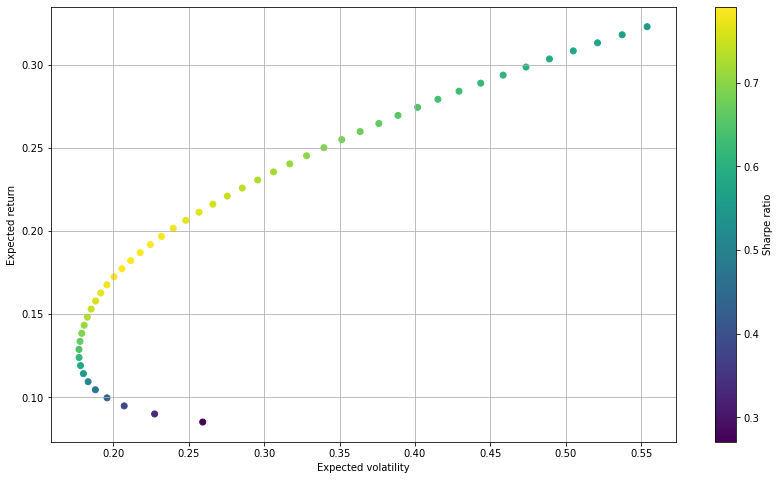

In [26]:
plt.figure(figsize=(14, 8))
plt.scatter(tvols, trets, c=(trets-rfr) / tvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');